<a href="https://colab.research.google.com/github/lopesita/STUDIUNS-GAMESLAB/blob/main/PA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mtick

In [72]:
url = 'https://raw.githubusercontent.com/lopesita/STUDIUNS-GAMESLAB/main/steam-games.csv'
data = pd.read_csv(url)

data['release_date'] = pd.to_datetime(data['release_date'], errors='coerce')
data.dropna(subset=['release_date'], inplace=True)
data['discounted_price'] = data['discounted_price'].replace('Free', 0).str.replace('[₹,,]', '', regex=True).astype(float)


In [73]:
print(f"\nNúmero de linhas: {data.shape[0]}")
print(f"Número de colunas: {data.shape[1]}")

print("\nTipos de Dados:")
print(data.dtypes)


Número de linhas: 42376
Número de colunas: 24

Tipos de Dados:
app_id                           int64
title                           object
release_date            datetime64[ns]
genres                          object
categories                      object
developer                       object
publisher                       object
original_price                  object
discount_percentage             object
discounted_price               float64
dlc_available                    int64
age_rating                       int64
content_descriptor              object
about_description               object
win_support                       bool
mac_support                       bool
linux_support                     bool
awards                           int64
overall_review                  object
overall_review_%               float64
overall_review_count           float64
recent_review                   object
recent_review_%                float64
recent_review_count            float64


In [74]:
print("\nMedidas de Posição e Dispersão:")
print(data.describe())


Medidas de Posição e Dispersão:
             app_id                   release_date  discounted_price  \
count  4.237600e+04                          42376      35974.000000   
mean   1.248028e+06  2019-12-25 17:43:45.410609920        436.709373   
min    1.000000e+01            1997-06-30 00:00:00          0.000000   
25%    5.916525e+05            2017-09-22 18:00:00        160.000000   
50%    1.146645e+06            2020-08-06 00:00:00        319.000000   
75%    1.824050e+06            2022-10-15 00:00:00        499.000000   
max    3.008050e+06            2024-09-09 00:00:00     150000.000000   
std    7.546935e+05                            NaN       1128.542532   

       dlc_available    age_rating        awards  overall_review_%  \
count   42376.000000  42376.000000  42376.000000      39935.000000   
mean        0.721682      0.055881      0.309515         77.162564   
min         0.000000      0.000000      0.000000          0.000000   
25%         0.000000      0.000000    

In [75]:
data['genres'] = data['genres'].str.split(',').apply(lambda x: [i.strip() for i in x] if isinstance(x, list) else [])
genres_count = data.explode('genres')['genres'].value_counts()
print(genres_count.head(10))

genres
Indie           29972
Action          18127
Adventure       17809
Casual          16294
Simulation       9868
Strategy         9025
RPG              7868
Free to Play     3913
Early Access     3865
Sports           2224
Name: count, dtype: int64


In [76]:
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

categories                 37
developer                 160
publisher                 181
original_price          37525
discount_percentage     37525
discounted_price         6402
content_descriptor      40008
about_description         108
overall_review           2441
overall_review_%         2441
overall_review_count     2441
recent_review           36889
recent_review_%         36889
recent_review_count     36889
dtype: int64


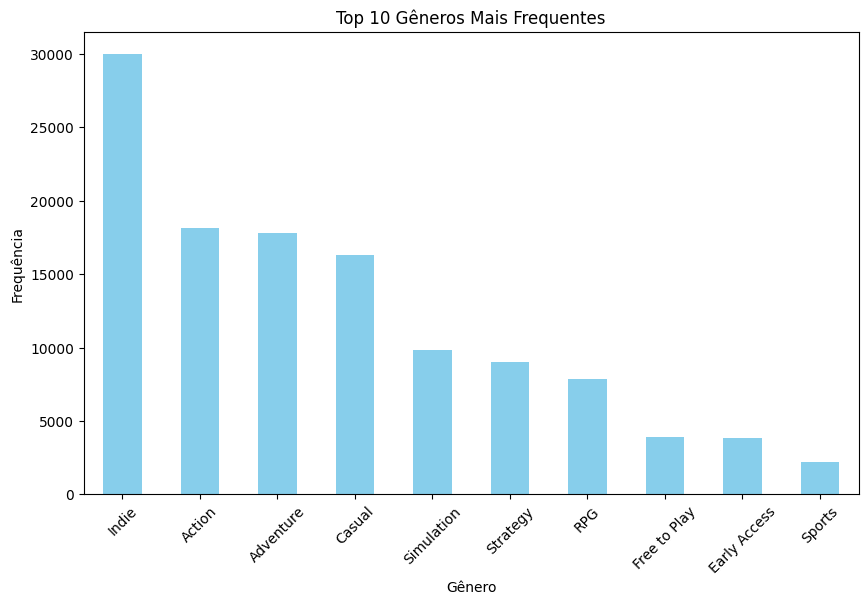

In [77]:
plt.figure(figsize=(10, 6))
genres_count.head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Gêneros Mais Frequentes")
plt.xlabel("Gênero")
plt.ylabel("Frequência")
plt.xticks(rotation=45)
plt.show()

In [78]:
data['year'] = data['release_date'].dt.year

genres_per_year = data.explode('genres').groupby(['year', 'genres']).size().unstack(fill_value=0)

top_genres = genres_per_year.sum().sort_values(ascending=False).head(100).index
genres_per_year[top_genres].tail(100)

genres,Indie,Action,Adventure,Casual,Simulation,Strategy,RPG,Free to Play,Early Access,Sports,...,Education,Game Development,Design & Illustration,Utilities,Audio Production,Animation & Modeling,Software Training,Video Production,Movie,Web Publishing
year,,,,,,,,,,,,,,,,,,,,,
1997,2,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1998,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1999,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2001,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2002,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2003,1,2,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2004,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2005,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<Figure size 1200x600 with 0 Axes>

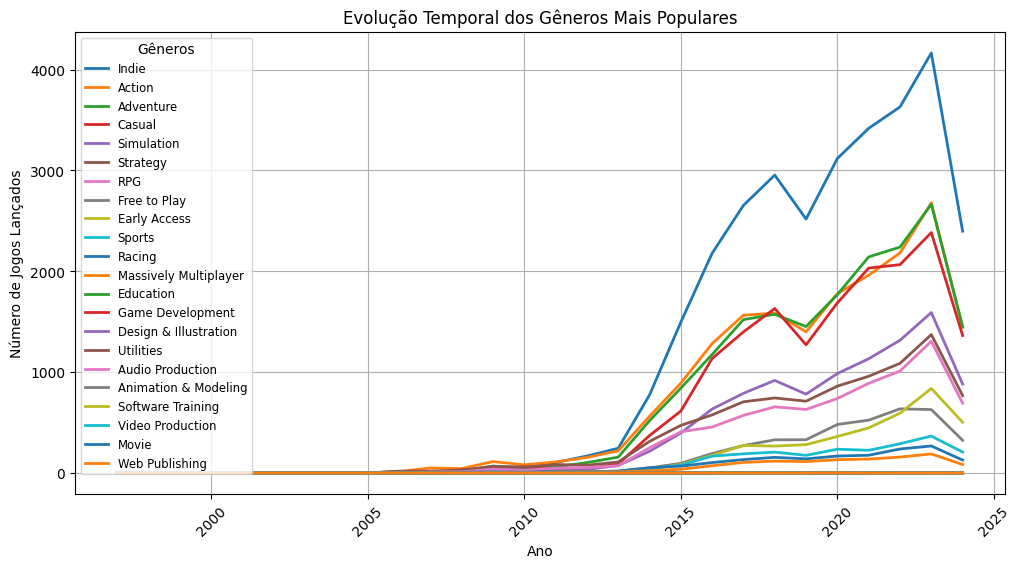

In [79]:

plt.figure(figsize=(12, 6))
genres_per_year[top_genres].plot(kind='line', figsize=(12, 6), linewidth=2)

plt.title('Evolução Temporal dos Gêneros Mais Populares')
plt.xlabel('Ano')
plt.ylabel('Número de Jogos Lançados')
plt.legend(title="Gêneros", fontsize='small', loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [82]:
data['negative_reviews'] = data['overall_review_count'] * (100 - data['overall_review_%']) / 100

data_exploded = data.explode('genres')

genre_reviews = data_exploded.groupby('genres').agg({
    'overall_review_%': 'mean',
    'overall_review_count': 'sum',
    'negative_reviews': 'sum'
}).sort_values(by='overall_review_count', ascending=False)

print(genre_reviews.head(10))

                       overall_review_%  overall_review_count  \
genres                                                          
Action                        76.267589            69079565.0   
Adventure                     77.162292            39384685.0   
Indie                         77.601758            37882734.0   
Free to Play                  75.661689            26782257.0   
RPG                           75.662975            24233834.0   
Simulation                    73.194015            19695716.0   
Strategy                      74.952219            17058483.0   
Casual                        78.616503            12770443.0   
Massively Multiplayer         65.769497            10961198.0   
Early Access                  73.213905             6221270.0   

                       negative_reviews  
genres                                   
Action                      10620584.96  
Adventure                    6027414.41  
Indie                        4115912.23  
Free to P

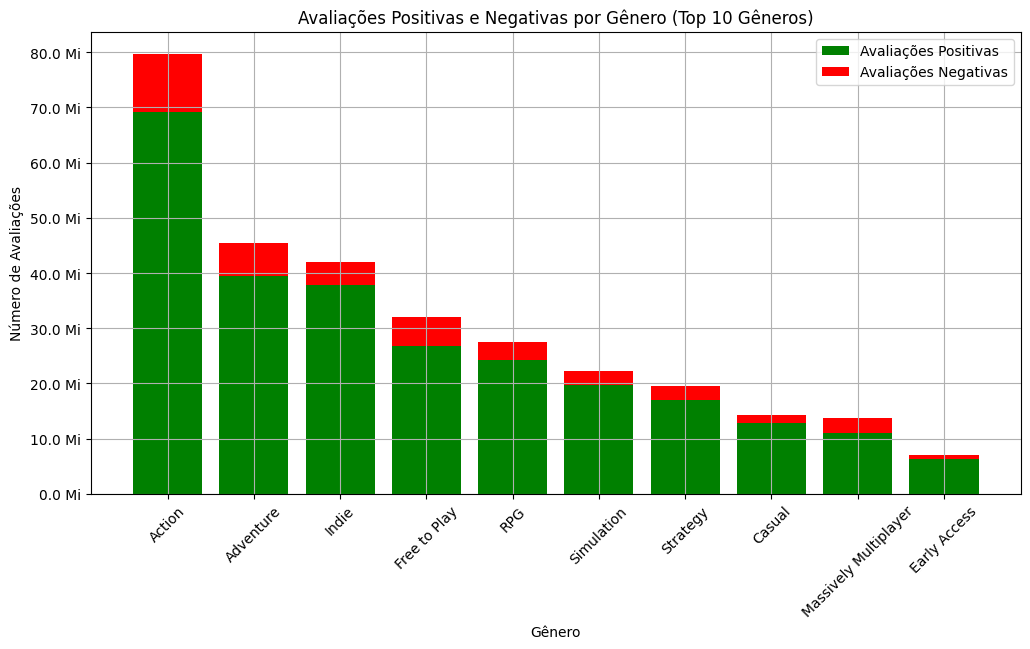

In [83]:
top_genres = genre_reviews.head(10)

plt.figure(figsize=(12, 6))

plt.bar(top_genres.index, top_genres['overall_review_count'], label='Avaliações Positivas', color='green')

plt.bar(top_genres.index, top_genres['negative_reviews'], bottom=top_genres['overall_review_count'],
        label='Avaliações Negativas', color='red')

plt.title('Avaliações Positivas e Negativas por Gênero (Top 10 Gêneros)')
plt.xlabel('Gênero')
plt.ylabel('Número de Avaliações')
plt.xticks(rotation=45)
plt.legend()

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x * 1e-6:.1f} Mi'))

plt.grid(True)
plt.show()

In [84]:
total_avaliacoes_positivas = data['overall_review_count'].sum()
total_avaliacoes_negativas = data['overall_review_count'].sum() - data['recent_review_count'].sum() # Exemplo

total_avaliacoes = total_avaliacoes_positivas + total_avaliacoes_negativas

print(f"Total de avaliações (positivas e negativas): {total_avaliacoes}")


Total de avaliações (positivas e negativas): 197757818.0


In [85]:
data['overall_review_count'] = pd.to_numeric(data['overall_review_count'], errors='coerce')
data['recent_review_count'] = pd.to_numeric(data['recent_review_count'], errors='coerce')

total_nulos_positivas = data['overall_review_count'].isnull().sum()
total_nulos_negativas = data['recent_review_count'].isnull().sum()

total_nulos = total_nulos_positivas + total_nulos_negativas

print(f"Total de valores nulos nas avaliações positivas: {total_nulos_positivas}")
print(f"Total de valores nulos nas avaliações negativas: {total_nulos_negativas}")
print(f"Total geral de valores nulos: {total_nulos}")

Total de valores nulos nas avaliações positivas: 2441
Total de valores nulos nas avaliações negativas: 36889
Total geral de valores nulos: 39330


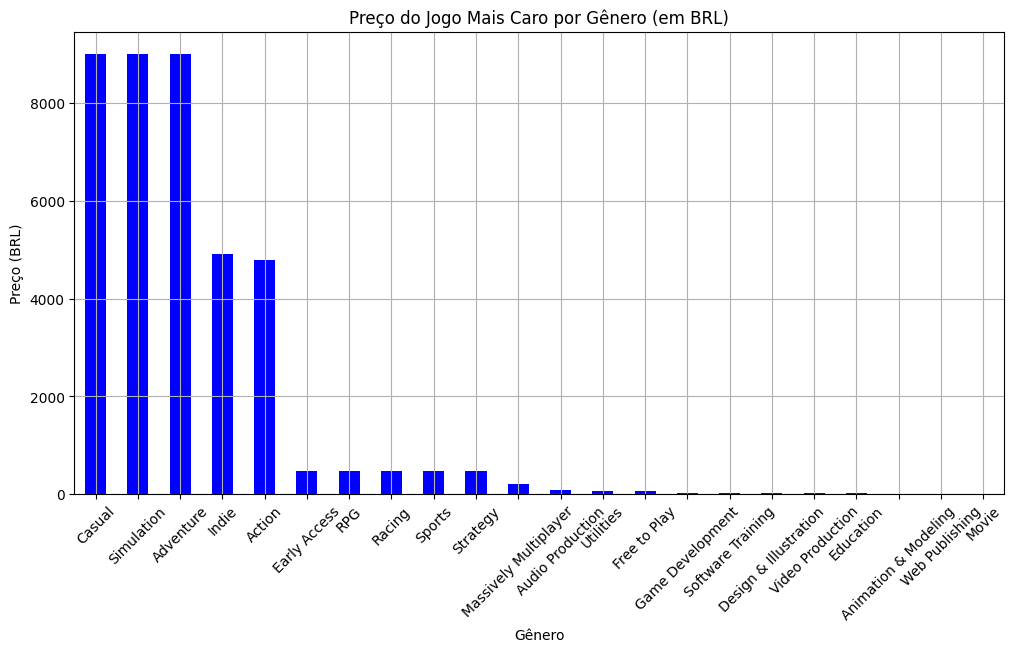

In [133]:
# Definir taxa de conversão de INR para BRL (exemplo: 1 INR = 0.06 BRL)
inr_to_brl = 0.06

# Filtrar o jogo mais caro por gênero
max_price_per_genre = data.explode('genres').groupby('genres')['discounted_price'].max() * inr_to_brl

# Ordenar do maior para o menor
max_price_per_genre_sorted = max_price_per_genre.sort_values(ascending=False)

# Plotar o gráfico
plt.figure(figsize=(12, 6))
max_price_per_genre_sorted.plot(kind='bar', color='blue')
plt.title('Preço do Jogo Mais Caro por Gênero (em BRL)')
plt.xlabel('Gênero')
plt.ylabel('Preço (BRL)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [139]:
# Remover valores nulos em 'discounted_price'
exploded_data = exploded_data.dropna(subset=['discounted_price'])

# Filtrar o jogo mais caro por gênero
max_price_per_genre_info = exploded_data.loc[exploded_data.groupby('genres')['discounted_price'].idxmax(skipna=True)]

# Converter o preço para BRL
max_price_per_genre_info['price_brl'] = max_price_per_genre_info['discounted_price'] * inr_to_brl

# Ordenar do maior para o menor
max_price_per_genre_info_sorted = max_price_per_genre_info.sort_values(by='price_brl', ascending=False)

# Exibir os jogos com o preço mais alto por gênero
print(max_price_per_genre_info_sorted[['title', 'genres', 'discounted_price', 'price_brl']])


                 title                 genres  discounted_price  price_brl
42121   Chandrayaan VR             Simulation          150000.0    9000.00
42121   Chandrayaan VR              Adventure          150000.0    9000.00
42121   Chandrayaan VR                 Casual          150000.0    9000.00
42121   Chandrayaan VR             Simulation          150000.0    9000.00
42121   Chandrayaan VR              Adventure          150000.0    9000.00
...                ...                    ...               ...        ...
22313  Flag Collection                  Indie              42.0       2.52
22313  Flag Collection             Simulation              42.0       2.52
22313  Flag Collection  Design & Illustration              42.0       2.52
22313  Flag Collection              Education              42.0       2.52
22313  Flag Collection         Web Publishing              42.0       2.52

[81 rows x 4 columns]
